In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso, Ridge
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LassoCV, RidgeCV

In [4]:
df_train = pd.read_csv('../data/processed/data_train.csv')
df_val = pd.read_csv('../data/processed/data_val.csv')
df_test = pd.read_csv('../data/processed/data_test.csv')

In [5]:
X_train, y_train = df_train.drop('Y', axis = 1), pd.DataFrame(df_train['Y'])
X_val, y_val = df_val.drop('Y', axis = 1), pd.DataFrame(df_val['Y'])
X_test, y_test = df_test.drop('Y', axis = 1), pd.DataFrame(df_test['Y'])

## Lasso Regression

In [6]:
lasso_model = Lasso().fit(X_train, y_train)

In [7]:
y_pred_lasso = lasso_model.predict(X_val)
print('basic model')
print(f'MSE: {np.sqrt(mean_squared_error(y_val,y_pred_lasso))}')
print(f'r2_score: {r2_score(y_val, y_pred_lasso)}')

basic model
MSE: 57579.55041524474
r2_score: -0.48813701323970204


In [ ]:
#wg lasso Dominika N = 401 

In [10]:
lasso_cv_model = LassoCV(alphas = [i for i in range(0,1000,10)], max_iter = 10000, cv = 5).fit(X_train,y_train)

In [36]:
N = lasso_cv_mode.alpha_
N 

440

In [32]:
lasso_cv_model = LassoCV(alphas = np.linspace(N-10,N+10,2001), max_iter = 10000, cv = 5).fit(X_train,y_train)

In [8]:
lasso_cv_model.alpha_

NameError: name 'lasso_cv_model' is not defined

In [9]:
N = 431.51

In [10]:
lasso_tuned = Lasso().set_params(alpha = N).fit(X_train,y_train)

In [11]:
y_pred_lasso_tuned = lasso_tuned.predict(X_val)
print('tuned model')
print(f'MSE: {np.sqrt(mean_squared_error(y_val,y_pred_lasso_tuned))}')
print(f'r2_score: {r2_score(y_val, y_pred_lasso_tuned)}')

tuned model
MSE: 53051.57862630722
r2_score: -0.26328983767381753


In [75]:
lasso_feature = pd.DataFrame(list(lasso_tuned.coef_), columns = ['coef'])
lasso_feature.index = list(X_train.columns)
lasso_feature.sort_values(by = 'coef', inplace = True)

<AxesSubplot:ylabel='coef'>

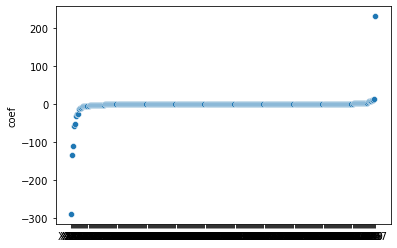

In [76]:
sns.scatterplot(x = lasso_feature.index, y = lasso_feature.coef)

[]

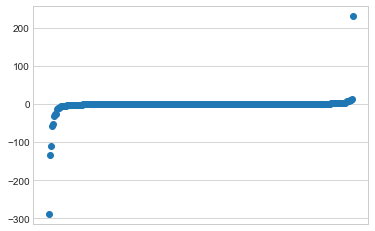

In [14]:
X_train[X_train.columns.intersection(list(lasso_feature[lasso_feature.coef != 0].index))]

,X1,X2,X3,X4,X9,X10,X11,X15,X16,X17,...,X283,X284,X285,X286,X287,X289,X290,X291,X292,X295
0,41,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,17367.1,34725.1,5789.0,4,14,2061.7,6185.0,12370.0,2061.7,6
1,45,0.0,0.0,0.0,126.3,187.7,187.7,4,0.0,0.0,...,37007.6,81348.2,12335.9,6,16,10621.0,31863.0,68430.7,10621.0,13
2,53,0.0,0.0,0.0,0.0,0.0,105.4,3,0.0,0.0,...,117977.1,183721.6,39325.7,12,18,5543.8,20045.1,36923.9,6681.7,6
3,37,0.0,0.0,0.0,30.1,134.8,134.8,3,2000.0,2000.0,...,8656.7,17206.7,2885.6,2,7,0.0,0.0,0.0,0.0,0
4,41,0.0,0.0,0.0,0.0,109.6,802.9,13,2000.0,2000.0,...,95572.0,183820.2,31857.3,5,15,11662.3,34309.1,67459.6,11436.4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,45,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,67200.0,89400.0,22400.0,5,16,0.0,0.0,0.0,0.0,0
5996,42,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,32543.6,97421.3,10847.9,2,10,8496.9,19910.6,36707.8,6636.9,6
5997,27,0.0,0.0,0.0,0.0,33.5,116.0,5,0.0,0.0,...,8398.5,20487.1,2799.5,8,26,2766.7,7225.6,16879.8,2408.5,7
5998,28,0.0,0.0,0.0,0.0,65.9,97.4,2,600.0,1750.0,...,91589.3,230381.9,30529.8,12,28,19650.9,48418.1,100542.2,16139.4,16


In [90]:
pd.DataFrame(lasso_feature[lasso_feature.coef != 0].index).to_csv('lasso_feature_150.csv')

In [89]:
list(lasso_feature[lasso_feature.coef != 0].index)

['X295',
 'X22',
 'X190',
 'X43',
 'X224',
 'X15',
 'X225',
 'X286',
 'X120',
 'X64',
 'X133',
 'X176',
 'X155',
 'X107',
 'X73',
 'X212',
 'X100',
 'X29',
 'X227',
 'X9',
 'X242',
 'X2',
 'X206',
 'X135',
 'X199',
 'X56',
 'X79',
 'X121',
 'X94',
 'X247',
 'X27',
 'X157',
 'X19',
 'X235',
 'X51',
 'X59',
 'X40',
 'X87',
 'X198',
 'X116',
 'X123',
 'X10',
 'X248',
 'X142',
 'X149',
 'X192',
 'X271',
 'X65',
 'X137',
 'X261',
 'X213',
 'X31',
 'X102',
 'X292',
 'X268',
 'X277',
 'X109',
 'X263',
 'X67',
 'X186',
 'X254',
 'X144',
 'X214',
 'X220',
 'X4',
 'X44',
 'X163',
 'X72',
 'X256',
 'X24',
 'X130',
 'X165',
 'X164',
 'X284',
 'X283',
 'X282',
 'X275',
 'X285',
 'X23',
 'X25',
 'X289',
 'X291',
 'X30',
 'X37',
 'X270',
 'X80',
 'X26',
 'X172',
 'X191',
 'X129',
 'X16',
 'X17',
 'X290',
 'X221',
 'X39',
 'X171',
 'X185',
 'X88',
 'X52',
 'X219',
 'X53',
 'X255',
 'X38',
 'X276',
 'X32',
 'X18',
 'X269',
 'X143',
 'X170',
 'X33',
 'X262',
 'X60',
 'X45',
 'X81',
 'X46',
 'X151',
 'X9

In [45]:
X_train[X_train.columns.intersection(list(lasso_feature[lasso_feature.coef.astype(int) != 0].index))]

,X1,X2,X3,X9,X11,X15,X19,X22,X27,X28,...,X228,X233,X234,X235,X241,X242,X247,X286,X287,X295
0,41,0.0,0.0,0.0,0.0,0,0.0,0,58,206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,14,6
1,45,0.0,0.0,126.3,187.7,4,0.0,0,112,263,...,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,6,16,13
2,53,0.0,0.0,0.0,105.4,3,0.0,0,51,160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,18,6
3,37,0.0,0.0,30.1,134.8,3,666.7,3,112,312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,7,0
4,41,0.0,0.0,0.0,802.9,13,666.7,5,111,297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,15,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,45,0.0,0.0,0.0,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,16,0
5996,42,0.0,0.0,0.0,0.0,0,0.0,0,24,61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,10,6
5997,27,0.0,0.0,0.0,116.0,5,0.0,0,40,114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,26,7
5998,28,0.0,0.0,0.0,97.4,2,583.3,3,106,334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,28,16
